<a href="https://colab.research.google.com/github/NguyenQuangHuy2001/AI_CNN/blob/main/CNN_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Khai báo thư viện

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

Tạo dataset

In [14]:
def create_img_dataset(raw_folder,dataset_name):
    target_size = (150, 150)
    pictures = []
    labels = []
    for folder in listdir(raw_folder):
      print("Folder=",folder)
      for file in listdir(raw_folder + "/" + folder):
        print("File=", file)
        pictures.append(cv2.resize(cv2.imread(raw_folder + "/" + folder + "/" + file)
                                              ,dsize = target_size))
        labels.append(folder)
    pictures = np.array(pictures)
    labels = np.array(labels)
    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    with open (dataset_name, mode = 'wb') as file:
    # dump information to that file
      pickle.dump((pictures,labels), file)
    file.close()
def load_data(dataset_path):
    file = open(dataset_path, mode = 'rb')
    # dump information to that file
    (pictures, labels) = pickle.load (file)
    file.close()
    return pictures, labels

Load dữ liệu

In [15]:
raw_folder = "/content/drive/MyDrive/Dataset of money"


create_img_dataset(raw_folder= raw_folder,dataset_name= 'dataset_money.txt')
x_data,y_data = load_data(dataset_path= 'dataset_money.txt')

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=100)

Folder= 500000
File= 500000_01.jpg
File= 500000_00.jpg
File= 500000_03.jpg
File= 500000_02.jpg
File= 500000_04.jpg
File= 500000_05.jpg
File= 500000_07.jpg
File= 500000_06.jpg
File= 500000_08.jpg
File= 500000_09.jpg
File= 500000_11.jpg
File= 500000_10.jpg
File= 500000_12.jpg
File= 500000_13.jpg
File= 500000_14.jpg
File= 500000_15.jpg
File= 500000_16.jpg
File= 500000_17.jpg
File= 500000_19.jpg
File= 500000_18.jpg
File= 500000_20.jpg
File= 500000_21.jpg
File= 500000_23.jpg
File= 500000_22.jpg
File= 500000_25.jpg
File= 500000_24.jpg
File= 500000_26.jpg
File= 500000_27.jpg
File= 500000_28.jpg
File= 500000_29.jpg
File= 500000_30.jpg
File= 500000_31.jpg
File= 500000_32.jpg
File= 500000_33.jpg
File= 500000_35.jpg
File= 500000_34.jpg
File= 500000_36.jpg
File= 500000_37.jpg
File= 500000_38.jpg
File= 500000_39.jpg
File= 500000_40.jpg
File= 500000_41.jpg
File= 500000_43.jpg
File= 500000_42.jpg
File= 500000_45.jpg
File= 500000_44.jpg
File= 500000_47.jpg
File= 500000_46.jpg
File= 500000_49.jpg
File=

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_test)

(1242, 150, 150, 3)
(1242, 9)
(311, 150, 150, 3)
(311, 9)
[[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [17]:

x_test_original = x_test;
y_test_original = y_test;

Đánh nhãn

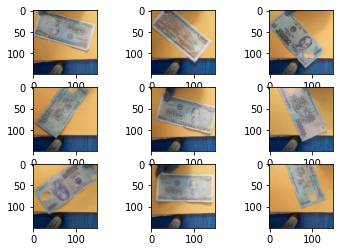

[1 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 1 0]
[1 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0]


In [22]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow (x_test_original[i],cmap=plt.get_cmap('gray'))
plt.show()
for i in range(9):
  print(y_test_original[i])


In [23]:
x_label = [' 1 ngàn',' 2 ngàn','5 ngàn','10 ngàn',
           '20 ngàn', '50 ngàn','100 ngàn','200 ngàn','500 ngàn']

Xử lý dữ liệu

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

#y_train = np_utils.to_categorical(y_train,9)
#y_test = np_utils.to_categorical(y_test,9)

Tạo model

In [25]:
model = Sequential()
model.add (Conv2D(32,(5,5),activation='relu',kernel_initializer='normal',padding='same',
                  input_shape=(150,150,3)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32,(5,5),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(5,5),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(5,5),activation='relu',kernel_initializer='normal',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='normal'))
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      25632     
                                                                 
 batch_normalization_1 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                        

Training model

In [ ]:
checkpoint = ModelCheckpoint(filepath= "SelfFace-weights-{epoch:02d}-{val_accuracy:.4f}.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.compile(loss='categorical_crossentropy',optimizer=SGD(lr = 0.01, momentum=0.9),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=20,batch_size = 256,validation_data=(x_test,y_test),verbose=1,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 19.0585 - accuracy: 0.1159  
Epoch 1: val_accuracy improved from -inf to 0.10611, saving model to SelfFace-weights-01-0.1061.h5
5/5 [==============================] - 420s 83s/step - loss: 19.0585 - accuracy: 0.1159 - val_loss: 723.4600 - val_accuracy: 0.1061
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 2.4317 - accuracy: 0.1659  
Epoch 2: val_accuracy improved from 0.10611 to 0.13505, saving model to SelfFace-weights-02-0.1350.h5
5/5 [==============================] - 389s 78s/step - loss: 2.4317 - accuracy: 0.1659 - val_loss: 2421.2441 - val_accuracy: 0.1350
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 2.1075 - accuracy: 0.2271  
Epoch 3: val_accuracy improved from 0.13505 to 0.13826, saving model to SelfFace-weights-03-0.1383.h5
5/5 [==============================] - 375s 75s/step - loss: 2.1075 - accuracy: 0.2271 - val_loss: 2419.7810 - val_accuracy: 0.1383
Epoch 4/20
5/5 [==

Đánh giá đọ chính xác

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print ('loss = ',score[0])
print ('accuracy = ',score[1])

loss =  1.240670919418335
accuracy =  0.7592592835426331


Dự đoán kết quả

picture  10
actual: [0 0 0 0 1 0 0 0 0]
predictions: [4]
predictions label: 20 ngàn


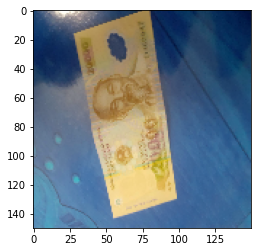

In [ ]:
# Show original Image
i = randint(0,len(y_test_original)-1)
print ("picture ",i)
print("actual:", y_test_original[i])
plt.imshow(x_test_original[i])

# Sample Predict
sample = np.array([x_test[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predictions:", predictions)
print("predictions label:", x_label[int(predictions)])

Vẽ đồ thị độ chính xác

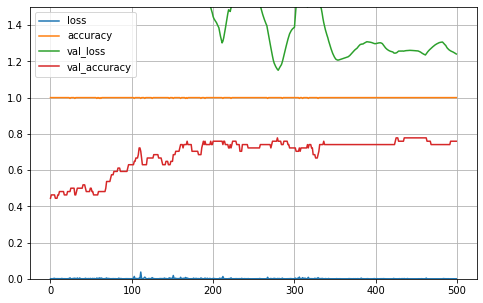

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


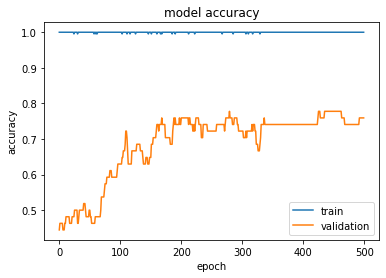

In [ ]:
# Graphs of accuracy
# Graphs of accuracy
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.5)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()